In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [2]:
# Importing all datasets
leads_dataframe = pd.read_csv("Leads.csv")
#leads_dataframe.head()

In [3]:
leads_dataframe.shape

(9240, 37)

In [4]:
leads_dataframe.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df =leads_dataframe

df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
#df.isnull().sum(axis=1)# Write your code for row-wise null count here

In [8]:
#checking the null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# checking column-wise null percentages here
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#Drop other unnecessary columns 
df_final = df.drop(['Prospect ID', 'Lead Number', 'Tags','Asymmetrique Activity Index', 
                    'Asymmetrique Profile Index','Asymmetrique Activity Score',
                    'Asymmetrique Profile Score', 'Lead Quality', 'City', 'Lead Profile', 
                    'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque', 'Receive More Updates About Our Courses', 'Last Activity'], axis=1)
df_final.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [11]:
#column wise null percentage
round(100*(df_final.isnull().sum()/len(df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

# Managing Missing values

In [12]:
country_values = df_final.groupby(['Country'])['Converted'].count()
country_values


Country
Asia/Pacific Region        2
Australia                 13
Bahrain                    7
Bangladesh                 2
Belgium                    2
Canada                     4
China                      2
Denmark                    1
France                     6
Germany                    4
Ghana                      2
Hong Kong                  7
India                   6492
Indonesia                  1
Italy                      2
Kenya                      1
Kuwait                     4
Liberia                    1
Malaysia                   1
Netherlands                2
Nigeria                    4
Oman                       6
Philippines                2
Qatar                     10
Russia                     1
Saudi Arabia              21
Singapore                 24
South Africa               4
Sri Lanka                  1
Sweden                     3
Switzerland                1
Tanzania                   1
Uganda                     2
United Arab Emirates      53
United

In [13]:
#Replace missing values in country column by 'unknown'
df_final['Country'].fillna('unknown', inplace=True)

In [14]:
Specialization_values = df_final.groupby(['Specialization'])['Converted'].count()
Specialization_values

Specialization
Banking, Investment And Insurance     338
Business Administration               403
E-Business                             57
E-COMMERCE                            112
Finance Management                    976
Healthcare Management                 159
Hospitality Management                114
Human Resource Management             848
IT Projects Management                366
International Business                178
Marketing Management                  838
Media and Advertising                 203
Operations Management                 503
Retail Management                     100
Rural and Agribusiness                 73
Select                               1942
Services Excellence                    40
Supply Chain Management               349
Travel and Tourism                    203
Name: Converted, dtype: int64

In [15]:
#replace all 'select' value with 'dont know'
df_final.replace('Select','dont know',inplace=True ) 
df_final['Specialization'].fillna('dont know', inplace=True)

In [16]:
df_final['How did you hear about X Education'].fillna('dont know', inplace=True)
df_final['What is your current occupation'].fillna('dont know', inplace=True)
df_final['What matters most to you in choosing a course'].fillna('dont know', inplace=True)
#df_final['Last Activity'].fillna('Unknown', inplace=True)
df_final['Lead Source'].fillna('Unknown', inplace=True)
df_final.dropna(inplace=True) # remove rows with all other null values
df_final.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [17]:
df_final.shape

(9103, 22)

In [18]:
df_final.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 22 columns):
Lead Origin                                      9103 non-null object
Lead Source                                      9103 non-null object
Do Not Email                                     9103 non-null object
Do Not Call                                      9103 non-null object
Converted                                        9103 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9103 non-null int64
Page Views Per Visit                             9103 non-null float64
Country                                          9103 non-null object
Specialization                                   9103 non-null object
How did you hear about X Education               9103 non-null object
What is your current occupation                  9103 non-null object
What matters most to you in choosing a course    9103

# Binary Mapping

In [20]:
##Binary Mapping
biniary_varlist=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
                'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']


# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df_final[biniary_varlist] = df_final[biniary_varlist].apply(binary_map)
df_final.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,unknown,dont know,...,Better Career Prospects,0,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,India,dont know,...,Better Career Prospects,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,...,Better Career Prospects,0,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,...,Better Career Prospects,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,dont know,...,Better Career Prospects,0,0,0,0,0,0,0,0,Modified


# Dummy Variables

In [21]:
#Create dummy variables for 'Lead Origin' column
status = pd.get_dummies(df_final['Lead Origin'], prefix='LeadOrigin', drop_first=True)
df_final = pd.concat([df_final, status], axis = 1)
df_final.drop(['Lead Origin'], axis = 1, inplace = True)

#Create dummy variables for 'Lead Source' column
status = pd.get_dummies(df_final['Lead Source'], prefix='LeadSource', drop_first=True)
df_final = pd.concat([df_final, status], axis = 1)
df_final.drop(['Lead Source'], axis = 1, inplace = True)

#Create dummy variables for 'Country' column
status = pd.get_dummies(df_final['Country'], prefix='Country', drop_first=True)
df_final = pd.concat([df_final, status], axis = 1)
df_final.drop(['Country'], axis = 1, inplace = True)

#Create dummy variables for 'Specialization' column
status = pd.get_dummies(df_final['Specialization'], prefix='Specialization', drop_first=True)
df_final = pd.concat([df_final, status], axis = 1)
df_final.drop(['Specialization'], axis = 1, inplace = True)

#Create dummy variables for 'HearAboutX' column
status = pd.get_dummies(df_final['How did you hear about X Education'], prefix='HearAboutX', drop_first=True)
df_final = pd.concat([df_final, status], axis = 1)
df_final.drop(['How did you hear about X Education'], axis = 1, inplace = True)

#Create dummy variables for 'CurrentOccupation' column
status = pd.get_dummies(df_final['What is your current occupation'], prefix='CurrentOccupation', drop_first=True)
df_final = pd.concat([df_final, status], axis = 1)
df_final.drop(['What is your current occupation'], axis = 1, inplace = True)

#Create dummy variables for 'MattersMost' column
status = pd.get_dummies(df_final['What matters most to you in choosing a course'], prefix='MattersMost', drop_first=True)
df_final = pd.concat([df_final, status], axis = 1)
df_final.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

#Create dummy variables for 'LastActivity' column
status = pd.get_dummies(df_final['Last Notable Activity'], prefix='LastNotableActivity', drop_first=True)
df_final = pd.concat([df_final, status], axis = 1)
df_final.drop(['Last Notable Activity'], axis = 1, inplace = True)



In [22]:
df_final.shape

(9103, 126)

# Test and Train Splitting

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Putting feature variable to X
X = df_final.drop(['Converted'], axis=1)
# Putting response variable to y
y = df_final['Converted']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [26]:
### Checking the conversion Rate
Convetred = (sum(df_final['Converted'])/len(df_final['Converted'].index))*100
Convetred

38.02043282434362

conversion rate is almost 38%

# Correlations

In [27]:
# Importing matplotlib and seaborn
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

In [28]:
# Let's see the correlation matrix 
#plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(df_final.corr(),annot = True)

# MODEL BUILDING

In [29]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                          118
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        12:09:48   Pearson chi2:                 8.97e+18
No. Iterations:                   100   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             3.298e+15   1.06e+08   3.12e+07      0.000     3.3e+15     3.3e+15
Do Not Email                                     -5.726e+14   3.58e+06   -1.6e+08      0.000   -5.73e+14   -5.73e+14
Do Not Call                                       5.389e+14   4.78e+07   1.13e+07      0.000    5.39e+14    5.39e+14
TotalVisits                                       1.296e+14   1.02e+06   1.27e+08      0.000     1.3e+14     1.3e+14
Total Time Spent on Website                       7.951e+14   9.87e+05   8.05e+08      0.000    7.95e+14    7.95e+14
Page Views Per Visit                             -1.018e+14    1.2e+06  -8.47e+07      0.000   -1.02e+14   -1.02e+14
Search                                           -3.242e+14   2.23e+07  -1.45e+07      0.000   -3.24e+14   -3.24e+14
Magazine                                           324.7479   1.29e-06   2.52e+08      0.000     324.748     324.748
Newspaper Article                                -5.022e+15   4.25e+07  -1.18e+08      0.000   -5.02e+15   -5.02e+15
X Education Forums                               -5.022e+15   4.25e+07  -1.18e+08      0.000   -5.02e+15   -5.02e+15
Newspaper                                        -2.027e+16   6.73e+07  -3.01e+08      0.000   -2.03e+16   -2.03e+16
Digital Advertisement                             1.624e+14    3.9e+07   4.17e+06      0.000    1.62e+14    1.62e+14
Through Recommendations                          -6.144e+14   3.15e+07  -1.95e+07      0.000   -6.14e+14   -6.14e+14
A free copy of Mastering The Interview           -5.568e+13   3.35e+06  -1.66e+07      0.000   -5.57e+13   -5.57e+13
LeadOrigin_Landing Page Submission               -4.288e+14   4.05e+06  -1.06e+08      0.000   -4.29e+14   -4.29e+14
LeadOrigin_Lead Add Form                         -2.101e+13    4.3e+07  -4.89e+05      0.000    -2.1e+13    -2.1e+13
LeadOrigin_Lead Import                           -4.585e+15   5.47e+07  -8.38e+07      0.000   -4.59e+15   -4.59e+15
LeadSource_Direct Traffic                         1.028e+15   5.47e+07   1.88e+07      0.000    1.03e+15    1.03e+15
LeadSource_Facebook                               5.844e+15   6.39e+07   9.15e+07      0.000    5.84e+15    5.84e+15
LeadSource_Google                                  1.28e+15   5.47e+07   2.34e+07      0.000    1.28e+15    1.28e+15
LeadSource_Live Chat                              5.155e+15   5.83e+07   8.84e+07      0.000    5.16e+15    5.16e+15
LeadSource_NC_EDM                                 7.189e+15   8.71e+07   8.26e+07      0.000    7.19e+15    7.19e+15
LeadSource_Olark Chat                             1.241e+15   5.45e+07   2.28e+07      0.000    1.24e+15    1.24e+15
LeadSource_Organic Search                         1.136e+15   5.47e+07   2.08e+07      0.000    1.14e+15    1.14e+15
Lea

# Feature Selection

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 13 variables as output

rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 19),
 ('TotalVisits', False, 45),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 54),
 ('Search', False, 95),
 ('Magazine', False, 96),
 ('Newspaper Article', False, 53),
 ('X Education Forums', False, 48),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 43),
 ('Through Recommendations', False, 26),
 ('A free copy of Mastering The Interview', False, 91),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 41),
 ('LeadSource_Direct Traffic', False, 32),
 ('LeadSource_Facebook', False, 78),
 ('LeadSource_Google', False, 61),
 ('LeadSource_Live Chat', False, 55),
 ('LeadSource_NC_EDM', True, 1),
 ('LeadSource_Olark Chat', False, 60),
 ('LeadSource_Organic Search', False, 42),
 ('LeadSource_Pay per Click Ads', False, 52),
 ('LeadSource_Press_Release', False, 99),
 ('LeadSource_Reference', False, 39),
 ('LeadSource_Referral Site

In [31]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'LeadOrigin_Lead Import',
       'LeadSource_Direct Traffic', 'LeadSource_Facebook', 'LeadSource_Google',
       'LeadSource_Live Chat', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Pay per Click Ads',
       'LeadSource_Press_Release', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_WeLearn', 'LeadSource_bing', 'LeadSource_blog',
       'LeadSource_google', 'LeadSource_testone',
       'LeadSource_welearnblog_Home', 'LeadSource_youtubechannel',
       'Country_Australia', 'Country_Bahrain', 'Country_Bangladesh',
       'Country_Belgium', 'Country_Canada', 'Country_China', 'Country_Denmark',
       'Country_France', 'Country_Germany', 'Country_Ghana',
       'Count

In [32]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.6
Date:                Mon, 10 Jun 2019   Deviance:                       5155.2
Time:                        12:09:55   Pearson chi2:                 6.20e+03
No. Iterations:                    22   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3636      0.117     -3.108      0.002      -0.593      -0.134
Do Not Email                                    -1.5583      0.181     -8.605      0.000      -1.913      -1.203
Total Time Spent on Website                      1.1176      0.041     27.284      0.000       1.037       1.198
Newspaper                                      -25.0176   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadOrigin_Landing Page Submission              -0.9124      0.122     -7.480      0.000      -1.151      -0.673
LeadOrigin_Lead Add Form                         2.3162      0.237      9.782      0.000       1.852       2.780
LeadSource_NC_EDM                               25.0269   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Unknown                               1.6362      1.134      1.443      0.149      -0.585       3.858
LeadSource_Welingak Website                      2.4665      0.759      3.248      0.001       0.978       3.955
Country_Italy                                  -25.0723   4.17e+04     -0.001      1.000   -8.17e+04    8.16e+04
Country_Nigeria                                -24.0658   5.18e+04     -0.000      1.000   -1.02e+05    1.01e+05
Country_Qatar                                  -22.5704   2.67e+04     -0.001      0.999   -5.23e+04    5.22e+04
Country_unknown                                  1.0608      0.119      8.888      0.000       0.827       1.295
Specialization_Hospitality Management           -0.7377      0.319     -2.315      0.021      -1.362      -0.113
Specialization_Services Excellence               0.9087      0.597      1.522      0.128      -0.262       2.079
Specialization_dont know                        -0.9923      0.123     -8.061      0.000      -1.234      -0.751
HearAboutX_Email                                 1.2161      0.573      2.123      0.034       0.093       2.339
CurrentOccupation_Housewife                     24.0799   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
CurrentOccupation_Working Professional           2.4040      0.193     12.432      0.000       2.025       2.783
MattersMost_dont know                           -1.1075      0.089    -12.487      0.000      -1.281      -0.934
LastNotableActivity_Had a Phone Conversation     3.1185      1.185      2.631      0.009       0.796       5.442
LastNotableActivity_Olark Chat Conversation     -0.7821      0.317     -2.467      0.014      -1.403      -0.161
LastNotableActivity_Resubscribed to emails      25.9533   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LastNotableActivity_SMS Sent                     1.6281      0.080     20.271      0.000       1.471       1.786
LastNotableActivity_Unreachable                  1.9791      0.525      3.772      0.000       0.951       3.00

In [33]:
# Drop LeadSource_NC_EDM because p-value is high
X_train_sm = X_train_sm.drop(['LeadSource_NC_EDM'], axis=1)
##again  re-creating model
X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.3
Date:                Mon, 10 Jun 2019   Deviance:                       5158.5
Time:                        12:10:00   Pearson chi2:                 6.20e+03
No. Iterations:                    22   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3637      0.117     -3.109      0.002      -0.593      -0.134
Do Not Email                                    -1.5593      0.181     -8.612      0.000      -1.914      -1.204
Total Time Spent on Website                      1.1178      0.041     27.295      0.000       1.038       1.198
Newspaper                                      -25.0195   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadOrigin_Landing Page Submission              -0.9110      0.122     -7.470      0.000      -1.150      -0.672
LeadOrigin_Lead Add Form                         2.3174      0.237      9.787      0.000       1.853       2.781
LeadSource_Unknown                               1.6376      1.134      1.445      0.149      -0.584       3.859
LeadSource_Welingak Website                      2.4672      0.759      3.249      0.001       0.979       3.955
Country_Italy                                  -25.0728   4.17e+04     -0.001      1.000   -8.17e+04    8.16e+04
Country_Nigeria                                -24.0663   5.18e+04     -0.000      1.000   -1.02e+05    1.01e+05
Country_Qatar                                  -22.5710   2.67e+04     -0.001      0.999   -5.23e+04    5.22e+04
Country_unknown                                  1.0607      0.119      8.889      0.000       0.827       1.295
Specialization_Hospitality Management           -0.7389      0.319     -2.319      0.020      -1.363      -0.114
Specialization_Services Excellence               0.9071      0.597      1.519      0.129      -0.263       2.077
Specialization_dont know                        -0.9932      0.123     -8.070      0.000      -1.234      -0.752
HearAboutX_Email                                 1.2146      0.573      2.120      0.034       0.092       2.338
CurrentOccupation_Housewife                     24.0786   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
CurrentOccupation_Working Professional           2.4035      0.193     12.430      0.000       2.024       2.782
MattersMost_dont know                           -1.1024      0.089    -12.447      0.000      -1.276      -0.929
LastNotableActivity_Had a Phone Conversation     3.1156      1.185      2.630      0.009       0.793       5.438
LastNotableActivity_Olark Chat Conversation     -0.7834      0.317     -2.472      0.013      -1.405      -0.162
LastNotableActivity_Resubscribed to emails      25.9495   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LastNotableActivity_SMS Sent                     1.6268      0.080     20.258      0.000       1.469       1.784
LastNotableActivity_Unreachable                  1.9765      0.525      3.768      0.000       0.948       3.005
LastNotableActivity_Unsubscribed                 1.4248      0.533      2.672      0.008       0.380       2.47

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Country_unknown,2.65
14,Specialization_dont know,2.18
4,LeadOrigin_Lead Add Form,1.89
3,LeadOrigin_Landing Page Submission,1.63
18,MattersMost_dont know,1.61
22,LastNotableActivity_SMS Sent,1.41
7,LeadSource_Welingak Website,1.37
1,Total Time Spent on Website,1.33
0,Do Not Email,1.19
17,CurrentOccupation_Working Professional,1.18


In [37]:

# Drop Newspaper because p-value is high
X_train_sm = X_train_sm.drop(['Newspaper'], axis=1)
##again  re-creating model
X_train_sm = sm.add_constant(X_train_sm)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.9
Date:                Mon, 10 Jun 2019   Deviance:                       5161.8
Time:                        12:24:17   Pearson chi2:                 6.20e+03
No. Iterations:                    22   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3634      0.117     -3.108      0.002      -0.593      -0.134
Do Not Email                                    -1.5577      0.181     -8.605      0.000      -1.913      -1.203
Total Time Spent on Website                      1.1152      0.041     27.265      0.000       1.035       1.195
LeadOrigin_Landing Page Submission              -0.9126      0.122     -7.486      0.000      -1.152      -0.674
LeadOrigin_Lead Add Form                         2.3175      0.237      9.788      0.000       1.853       2.782
LeadSource_Unknown                               1.6371      1.134      1.444      0.149      -0.585       3.859
LeadSource_Welingak Website                      2.4669      0.759      3.249      0.001       0.979       3.955
Country_Italy                                  -25.0679   4.17e+04     -0.001      1.000   -8.17e+04    8.17e+04
Country_Nigeria                                -24.0637   5.18e+04     -0.000      1.000   -1.02e+05    1.01e+05
Country_Qatar                                  -22.5702   2.67e+04     -0.001      0.999   -5.23e+04    5.22e+04
Country_unknown                                  1.0575      0.119      8.867      0.000       0.824       1.291
Specialization_Hospitality Management           -0.7366      0.319     -2.312      0.021      -1.361      -0.112
Specialization_Services Excellence               0.9076      0.597      1.521      0.128      -0.262       2.077
Specialization_dont know                        -0.9932      0.123     -8.072      0.000      -1.234      -0.752
HearAboutX_Email                                 1.2150      0.573      2.121      0.034       0.092       2.338
CurrentOccupation_Housewife                     24.0798   2.59e+04      0.001      0.999   -5.06e+04    5.07e+04
CurrentOccupation_Working Professional           2.4044      0.193     12.438      0.000       2.026       2.783
MattersMost_dont know                           -1.1007      0.089    -12.432      0.000      -1.274      -0.927
LastNotableActivity_Had a Phone Conversation     3.1160      1.184      2.631      0.009       0.794       5.438
LastNotableActivity_Olark Chat Conversation     -0.7819      0.317     -2.468      0.014      -1.403      -0.161
LastNotableActivity_Resubscribed to emails      25.9484   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LastNotableActivity_SMS Sent                     1.6278      0.080     20.278      0.000       1.470       1.785
LastNotableActivity_Unreachable                  1.9768      0.524      3.770      0.000       0.949       3.005
LastNotableActivity_Unsubscribed                 1.4248      0.533      2.673      0.008       0.380       2.469
===============================================================================================================

In [40]:
# Drop Country_Italy, Country_Nigeria, Country_Qatar because p-value is high
X_train_sm = X_train_sm.drop(['Country_Italy'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.9
Date:                Mon, 10 Jun 2019   Deviance:                       5167.9
Time:                        12:25:27   Pearson chi2:                 6.20e+03
No. Iterations:                    22   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3623      0.117     -3.100      0.002      -0.591      -0.133
Do Not Email                                    -1.5547      0.181     -8.593      0.000      -1.909      -1.200
Total Time Spent on Website                      1.1124      0.041     27.235      0.000       1.032       1.192
LeadOrigin_Landing Page Submission              -0.9131      0.122     -7.495      0.000      -1.152      -0.674
LeadOrigin_Lead Add Form                         2.3172      0.237      9.788      0.000       1.853       2.781
LeadSource_Unknown                               1.6373      1.133      1.445      0.149      -0.584       3.859
LeadSource_Welingak Website                      2.4665      0.759      3.249      0.001       0.978       3.955
Country_Nigeria                                -24.0583   5.18e+04     -0.000      1.000   -1.02e+05    1.02e+05
Country_Qatar                                  -22.5670   2.67e+04     -0.001      0.999   -5.23e+04    5.23e+04
Country_unknown                                  1.0551      0.119      8.854      0.000       0.822       1.289
Specialization_Hospitality Management           -0.7342      0.318     -2.305      0.021      -1.358      -0.110
Specialization_Services Excellence               0.9071      0.596      1.521      0.128      -0.262       2.076
Specialization_dont know                        -0.9931      0.123     -8.076      0.000      -1.234      -0.752
HearAboutX_Email                                 1.2151      0.572      2.123      0.034       0.093       2.337
CurrentOccupation_Housewife                     24.0790   2.59e+04      0.001      0.999   -5.07e+04    5.07e+04
CurrentOccupation_Working Professional           2.4048      0.193     12.446      0.000       2.026       2.784
MattersMost_dont know                           -1.1001      0.088    -12.435      0.000      -1.273      -0.927
LastNotableActivity_Had a Phone Conversation     3.1149      1.184      2.630      0.009       0.794       5.436
LastNotableActivity_Olark Chat Conversation     -0.7814      0.317     -2.468      0.014      -1.402      -0.161
LastNotableActivity_Resubscribed to emails      25.9466   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LastNotableActivity_SMS Sent                     1.6223      0.080     20.233      0.000       1.465       1.779
LastNotableActivity_Unreachable                  1.9759      0.524      3.769      0.000       0.948       3.003
LastNotableActivity_Unsubscribed                 1.4221      0.533      2.670      0.008       0.378       2.466
================================================================================================================
"""

In [41]:
# Drop Country_Italy, Country_Nigeria, Country_Qatar because p-value is high
X_train_sm = X_train_sm.drop(['Country_Nigeria'], axis=1)

X_train_sm = sm.add_constant(X_train_sm)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.8
Date:                Mon, 10 Jun 2019   Deviance:                       5171.6
Time:                        12:25:30   Pearson chi2:                 6.20e+03
No. Iterations:                    22   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3622      0.117     -3.100      0.002      -0.591      -0.133
Do Not Email                                    -1.5524      0.181     -8.583      0.000      -1.907      -1.198
Total Time Spent on Website                      1.1117      0.041     27.228      0.000       1.032       1.192
LeadOrigin_Landing Page Submission              -0.9150      0.122     -7.512      0.000      -1.154      -0.676
LeadOrigin_Lead Add Form                         2.3174      0.237      9.790      0.000       1.854       2.781
LeadSource_Unknown                               1.6373      1.133      1.445      0.149      -0.584       3.859
LeadSource_Welingak Website                      2.4660      0.759      3.248      0.001       0.978       3.954
Country_Qatar                                  -22.5637   2.67e+04     -0.001      0.999   -5.23e+04    5.23e+04
Country_unknown                                  1.0542      0.119      8.849      0.000       0.821       1.288
Specialization_Hospitality Management           -0.7322      0.318     -2.299      0.021      -1.356      -0.108
Specialization_Services Excellence               0.9080      0.596      1.523      0.128      -0.261       2.077
Specialization_dont know                        -0.9927      0.123     -8.074      0.000      -1.234      -0.752
HearAboutX_Email                                 1.2170      0.572      2.127      0.033       0.096       2.338
CurrentOccupation_Housewife                     24.0805   2.59e+04      0.001      0.999   -5.07e+04    5.07e+04
CurrentOccupation_Working Professional           2.4065      0.193     12.457      0.000       2.028       2.785
MattersMost_dont know                           -1.0985      0.088    -12.421      0.000      -1.272      -0.925
LastNotableActivity_Had a Phone Conversation     3.1159      1.184      2.632      0.008       0.795       5.437
LastNotableActivity_Olark Chat Conversation     -0.7814      0.316     -2.469      0.014      -1.402      -0.161
LastNotableActivity_Resubscribed to emails      25.9448   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LastNotableActivity_SMS Sent                     1.6195      0.080     20.212      0.000       1.462       1.777
LastNotableActivity_Unreachable                  1.9764      0.524      3.770      0.000       0.949       3.004
LastNotableActivity_Unsubscribed                 1.4205      0.533      2.667      0.008       0.377       2.464
================================================================================================================
"""

In [42]:
X_train_sm = X_train_sm.drop(['LastNotableActivity_Resubscribed to emails'], axis=1)

X_train_sm = sm.add_constant(X_train_sm)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.3
Date:                Mon, 10 Jun 2019   Deviance:                       5176.6
Time:                        12:25:33   Pearson chi2:                 6.20e+03
No. Iterations:                    21   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3635      0.117     -3.111      0.002      -0.592      -0.135
Do Not Email                                    -1.5530      0.181     -8.588      0.000      -1.907      -1.199
Total Time Spent on Website                      1.1113      0.041     27.227      0.000       1.031       1.191
LeadOrigin_Landing Page Submission              -0.9141      0.122     -7.506      0.000      -1.153      -0.675
LeadOrigin_Lead Add Form                         2.3138      0.237      9.776      0.000       1.850       2.778
LeadSource_Unknown                               1.6357      1.133      1.444      0.149      -0.585       3.856
LeadSource_Welingak Website                      2.4655      0.759      3.248      0.001       0.978       3.953
Country_Qatar                                  -21.5628   1.62e+04     -0.001      0.999   -3.17e+04    3.17e+04
Country_unknown                                  1.0588      0.119      8.894      0.000       0.825       1.292
Specialization_Hospitality Management           -0.7317      0.318     -2.298      0.022      -1.356      -0.108
Specialization_Services Excellence               0.9080      0.596      1.523      0.128      -0.260       2.076
Specialization_dont know                        -0.9915      0.123     -8.065      0.000      -1.232      -0.751
HearAboutX_Email                                 1.2168      0.572      2.127      0.033       0.096       2.338
CurrentOccupation_Housewife                     23.0808   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
CurrentOccupation_Working Professional           2.4066      0.193     12.459      0.000       2.028       2.785
MattersMost_dont know                           -1.0937      0.088    -12.383      0.000      -1.267      -0.921
LastNotableActivity_Had a Phone Conversation     3.1146      1.184      2.631      0.009       0.795       5.434
LastNotableActivity_Olark Chat Conversation     -0.7850      0.316     -2.482      0.013      -1.405      -0.165
LastNotableActivity_SMS Sent                     1.6183      0.080     20.202      0.000       1.461       1.775
LastNotableActivity_Unreachable                  1.9742      0.524      3.768      0.000       0.947       3.001
LastNotableActivity_Unsubscribed                 1.4199      0.532      2.667      0.008       0.376       2.463
================================================================================================================
"""

In [43]:
# Drop Country_Qatar because p-value is high

X_train_sm = X_train_sm.drop(['Country_Qatar'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Mon, 10 Jun 2019   Deviance:                       5180.7
Time:                        12:25:37   Pearson chi2:                 6.21e+03
No. Iterations:                    21   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3644      0.117     -3.119      0.002      -0.593      -0.135
Do Not Email                                    -1.5540      0.181     -8.598      0.000      -1.908      -1.200
Total Time Spent on Website                      1.1123      0.041     27.255      0.000       1.032       1.192
LeadOrigin_Landing Page Submission              -0.9164      0.122     -7.524      0.000      -1.155      -0.678
LeadOrigin_Lead Add Form                         2.3141      0.237      9.778      0.000       1.850       2.778
LeadSource_Unknown                               1.6364      1.133      1.444      0.149      -0.584       3.857
LeadSource_Welingak Website                      2.4660      0.759      3.248      0.001       0.978       3.954
Country_unknown                                  1.0606      0.119      8.911      0.000       0.827       1.294
Specialization_Hospitality Management           -0.7300      0.318     -2.292      0.022      -1.354      -0.106
Specialization_Services Excellence               0.9111      0.596      1.528      0.126      -0.257       2.079
Specialization_dont know                        -0.9915      0.123     -8.066      0.000      -1.232      -0.751
HearAboutX_Email                                 1.2201      0.572      2.133      0.033       0.099       2.342
CurrentOccupation_Housewife                     23.0837   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
CurrentOccupation_Working Professional           2.4094      0.193     12.472      0.000       2.031       2.788
MattersMost_dont know                           -1.0922      0.088    -12.368      0.000      -1.265      -0.919
LastNotableActivity_Had a Phone Conversation     3.1174      1.184      2.634      0.008       0.797       5.437
LastNotableActivity_Olark Chat Conversation     -0.7852      0.316     -2.483      0.013      -1.405      -0.165
LastNotableActivity_SMS Sent                     1.6165      0.080     20.192      0.000       1.460       1.773
LastNotableActivity_Unreachable                  1.9759      0.524      3.771      0.000       0.949       3.003
LastNotableActivity_Unsubscribed                 1.4223      0.532      2.671      0.008       0.379       2.466
================================================================================================================
"""

In [44]:
# Drop CurrentOccupation_Housewife because p-value is high
X_train_sm = X_train_sm.drop(['CurrentOccupation_Housewife'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.5
Date:                Mon, 10 Jun 2019   Deviance:                       5193.1
Time:                        12:25:39   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3582      0.117     -3.070      0.002      -0.587      -0.130
Do Not Email                                    -1.5579      0.181     -8.624      0.000      -1.912      -1.204
Total Time Spent on Website                      1.1115      0.041     27.272      0.000       1.032       1.191
LeadOrigin_Landing Page Submission              -0.9117      0.122     -7.496      0.000      -1.150      -0.673
LeadOrigin_Lead Add Form                         2.3174      0.237      9.796      0.000       1.854       2.781
LeadSource_Unknown                               1.6354      1.133      1.444      0.149      -0.585       3.855
LeadSource_Welingak Website                      2.4623      0.759      3.243      0.001       0.974       3.950
Country_unknown                                  1.0592      0.119      8.903      0.000       0.826       1.292
Specialization_Hospitality Management           -0.7360      0.318     -2.312      0.021      -1.360      -0.112
Specialization_Services Excellence               0.9047      0.596      1.518      0.129      -0.263       2.073
Specialization_dont know                        -0.9940      0.123     -8.094      0.000      -1.235      -0.753
HearAboutX_Email                                 1.2120      0.572      2.119      0.034       0.091       2.333
CurrentOccupation_Working Professional           2.4020      0.193     12.438      0.000       2.023       2.780
MattersMost_dont know                           -1.0971      0.088    -12.430      0.000      -1.270      -0.924
LastNotableActivity_Had a Phone Conversation     3.1083      1.184      2.626      0.009       0.788       5.429
LastNotableActivity_Olark Chat Conversation     -0.7878      0.316     -2.490      0.013      -1.408      -0.168
LastNotableActivity_SMS Sent                     1.6096      0.080     20.122      0.000       1.453       1.766
LastNotableActivity_Unreachable                  1.9692      0.524      3.757      0.000       0.942       2.996
LastNotableActivity_Unsubscribed                 1.4197      0.532      2.666      0.008       0.376       2.463
================================================================================================================
"""

In [45]:
# Drop CurrentOccupation_Housewife because p-value is high
X_train_sm = X_train_sm.drop(['HearAboutX_Email'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.8
Date:                Mon, 10 Jun 2019   Deviance:                       5197.5
Time:                        12:25:41   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3567      0.117     -3.058      0.002      -0.585      -0.128
Do Not Email                                    -1.5629      0.181     -8.656      0.000      -1.917      -1.209
Total Time Spent on Website                      1.1096      0.041     27.258      0.000       1.030       1.189
LeadOrigin_Landing Page Submission              -0.9040      0.122     -7.439      0.000      -1.142      -0.666
LeadOrigin_Lead Add Form                         2.3167      0.237      9.793      0.000       1.853       2.780
LeadSource_Unknown                               1.6376      1.132      1.446      0.148      -0.582       3.857
LeadSource_Welingak Website                      2.4643      0.759      3.246      0.001       0.976       3.952
Country_unknown                                  1.0566      0.119      8.885      0.000       0.824       1.290
Specialization_Hospitality Management           -0.7264      0.320     -2.273      0.023      -1.353      -0.100
Specialization_Services Excellence               0.8991      0.596      1.509      0.131      -0.268       2.067
Specialization_dont know                        -0.9942      0.123     -8.098      0.000      -1.235      -0.754
CurrentOccupation_Working Professional           2.4064      0.193     12.470      0.000       2.028       2.785
MattersMost_dont know                           -1.0978      0.088    -12.448      0.000      -1.271      -0.925
LastNotableActivity_Had a Phone Conversation     3.0996      1.184      2.619      0.009       0.780       5.419
LastNotableActivity_Olark Chat Conversation     -0.7885      0.316     -2.492      0.013      -1.409      -0.168
LastNotableActivity_SMS Sent                     1.6086      0.080     20.124      0.000       1.452       1.765
LastNotableActivity_Unreachable                  1.9630      0.524      3.746      0.000       0.936       2.990
LastNotableActivity_Unsubscribed                 1.4200      0.532      2.667      0.008       0.376       2.464
================================================================================================================
"""

In [46]:

X_train_sm = X_train_sm.drop(['LeadSource_Unknown'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.2
Date:                Mon, 10 Jun 2019   Deviance:                       5200.4
Time:                        12:25:43   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3674      0.116     -3.154      0.002      -0.596      -0.139
Do Not Email                                    -1.5444      0.179     -8.646      0.000      -1.895      -1.194
Total Time Spent on Website                      1.1096      0.041     27.259      0.000       1.030       1.189
LeadOrigin_Landing Page Submission              -0.8949      0.121     -7.372      0.000      -1.133      -0.657
LeadOrigin_Lead Add Form                         2.4018      0.234     10.273      0.000       1.944       2.860
LeadSource_Welingak Website                      2.3699      0.758      3.128      0.002       0.885       3.855
Country_unknown                                  1.0579      0.119      8.898      0.000       0.825       1.291
Specialization_Hospitality Management           -0.7323      0.320     -2.286      0.022      -1.360      -0.104
Specialization_Services Excellence               0.8940      0.596      1.501      0.133      -0.273       2.061
Specialization_dont know                        -0.9808      0.123     -8.002      0.000      -1.221      -0.741
CurrentOccupation_Working Professional           2.4057      0.193     12.468      0.000       2.028       2.784
MattersMost_dont know                           -1.0996      0.088    -12.471      0.000      -1.272      -0.927
LastNotableActivity_Had a Phone Conversation     3.1023      1.184      2.621      0.009       0.783       5.422
LastNotableActivity_Olark Chat Conversation     -0.7890      0.316     -2.495      0.013      -1.409      -0.169
LastNotableActivity_SMS Sent                     1.6111      0.080     20.167      0.000       1.454       1.768
LastNotableActivity_Unreachable                  1.9646      0.524      3.749      0.000       0.937       2.992
LastNotableActivity_Unsubscribed                 1.4503      0.520      2.788      0.005       0.431       2.470
================================================================================================================
"""

In [47]:
X_train_sm = X_train_sm.drop(['Specialization_Services Excellence'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.3
Date:                Mon, 10 Jun 2019   Deviance:                       5202.5
Time:                        12:25:45   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3627      0.116     -3.116      0.002      -0.591      -0.135
Do Not Email                                    -1.5236      0.178     -8.568      0.000      -1.872      -1.175
Total Time Spent on Website                      1.1087      0.041     27.247      0.000       1.029       1.188
LeadOrigin_Landing Page Submission              -0.8954      0.121     -7.379      0.000      -1.133      -0.658
LeadOrigin_Lead Add Form                         2.4019      0.234     10.277      0.000       1.944       2.860
LeadSource_Welingak Website                      2.3644      0.757      3.122      0.002       0.880       3.849
Country_unknown                                  1.0564      0.119      8.891      0.000       0.824       1.289
Specialization_Hospitality Management           -0.7356      0.320     -2.298      0.022      -1.363      -0.108
Specialization_dont know                        -0.9856      0.122     -8.049      0.000      -1.226      -0.746
CurrentOccupation_Working Professional           2.4015      0.193     12.451      0.000       2.023       2.780
MattersMost_dont know                           -1.0995      0.088    -12.469      0.000      -1.272      -0.927
LastNotableActivity_Had a Phone Conversation     3.0979      1.183      2.618      0.009       0.778       5.417
LastNotableActivity_Olark Chat Conversation     -0.7684      0.314     -2.444      0.015      -1.385      -0.152
LastNotableActivity_SMS Sent                     1.6092      0.080     20.158      0.000       1.453       1.766
LastNotableActivity_Unreachable                  1.9614      0.524      3.742      0.000       0.934       2.989
LastNotableActivity_Unsubscribed                 1.4273      0.520      2.746      0.006       0.408       2.446
================================================================================================================
"""

In [48]:
X_train_sm = X_train_sm.drop(['Specialization_Hospitality Management'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.9
Date:                Mon, 10 Jun 2019   Deviance:                       5207.9
Time:                        12:25:46   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3787      0.116     -3.257      0.001      -0.607      -0.151
Do Not Email                                    -1.5200      0.178     -8.557      0.000      -1.868      -1.172
Total Time Spent on Website                      1.1056      0.041     27.209      0.000       1.026       1.185
LeadOrigin_Landing Page Submission              -0.8907      0.121     -7.340      0.000      -1.129      -0.653
LeadOrigin_Lead Add Form                         2.3814      0.233     10.213      0.000       1.924       2.838
LeadSource_Welingak Website                      2.3834      0.757      3.148      0.002       0.899       3.867
Country_unknown                                  1.0542      0.119      8.878      0.000       0.821       1.287
Specialization_dont know                        -0.9694      0.122     -7.933      0.000      -1.209      -0.730
CurrentOccupation_Working Professional           2.3843      0.192     12.389      0.000       2.007       2.762
MattersMost_dont know                           -1.0978      0.088    -12.454      0.000      -1.271      -0.925
LastNotableActivity_Had a Phone Conversation     3.1086      1.183      2.628      0.009       0.790       5.427
LastNotableActivity_Olark Chat Conversation     -0.7628      0.314     -2.430      0.015      -1.378      -0.148
LastNotableActivity_SMS Sent                     1.6103      0.080     20.187      0.000       1.454       1.767
LastNotableActivity_Unreachable                  1.9712      0.524      3.765      0.000       0.945       2.997
LastNotableActivity_Unsubscribed                 1.4333      0.519      2.761      0.006       0.416       2.451
================================================================================================================
"""

In [49]:
X_train_sm = X_train_sm.drop(['LastNotableActivity_Olark Chat Conversation'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.3
Date:                Mon, 10 Jun 2019   Deviance:                       5214.5
Time:                        12:25:48   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3913      0.116     -3.369      0.001      -0.619      -0.164
Do Not Email                                    -1.5154      0.178     -8.532      0.000      -1.864      -1.167
Total Time Spent on Website                      1.1025      0.041     27.151      0.000       1.023       1.182
LeadOrigin_Landing Page Submission              -0.8830      0.121     -7.278      0.000      -1.121      -0.645
LeadOrigin_Lead Add Form                         2.4056      0.233     10.319      0.000       1.949       2.862
LeadSource_Welingak Website                      2.3710      0.757      3.131      0.002       0.887       3.855
Country_unknown                                  1.0378      0.119      8.757      0.000       0.806       1.270
Specialization_dont know                        -0.9764      0.122     -7.993      0.000      -1.216      -0.737
CurrentOccupation_Working Professional           2.3871      0.193     12.395      0.000       2.010       2.765
MattersMost_dont know                           -1.1061      0.088    -12.560      0.000      -1.279      -0.933
LastNotableActivity_Had a Phone Conversation     3.1165      1.183      2.634      0.008       0.798       5.435
LastNotableActivity_SMS Sent                     1.6237      0.080     20.390      0.000       1.468       1.780
LastNotableActivity_Unreachable                  1.9850      0.524      3.788      0.000       0.958       3.012
LastNotableActivity_Unsubscribed                 1.4439      0.519      2.780      0.005       0.426       2.462
================================================================================================================
"""

In [50]:
## Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.878366
5520    0.106748
1962    0.053126
1566    0.933981
9170    0.213953
5097    0.082615
8954    0.539960
309     0.152628
5519    0.313540
1050    0.488801
dtype: float64

In [51]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.8783658 , 0.10674824, 0.05312578, 0.93398075, 0.21395267,
       0.08261485, 0.53996017, 0.15262802, 0.31353994, 0.4888006 ])

In [52]:
##creating dataframe with converted values and probabilities
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,CustID
0,0,0.878366,7962
1,0,0.106748,5520
2,0,0.053126,1962
3,1,0.933981,1566
4,0,0.213953,9170


In [53]:
##creating column predicted with conversion probability >.5 or 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,CustID,predicted
0,0,0.878366,7962,1
1,0,0.106748,5520,0
2,0,0.053126,1962,0
3,1,0.933981,1566,1
4,0,0.213953,9170,0


In [54]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3506  447]
 [ 741 1678]]


In [55]:
# checking the  accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8135593220338984


# Metrics beyond simple accuracy

In [69]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [70]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6936750723439438

In [71]:
# Let us calculate specificity
TN / float(TN+FP)

0.8869213255755123

In [72]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11307867442448773


In [73]:
# positive predictive value 
print (TP / float(TP+FP))

0.7896470588235294


In [74]:
# Negative predictive value
print (TN / float(TN+ FN))

0.825523899222981


# ROC Curve

In [58]:
import matplotlib.pyplot as plt
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


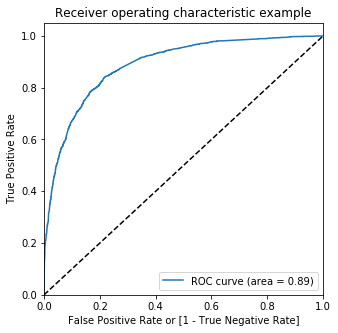

In [59]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

# Finding cutoff

In [60]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.878366,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.106748,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.053126,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.933981,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.213953,9170,0,1,1,1,0,0,0,0,0,0,0


In [61]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.619743  0.976850  0.401214
0.2   0.2  0.750942  0.917735  0.648874
0.3   0.3  0.804771  0.840017  0.783203
0.4   0.4  0.815756  0.782968  0.835821
0.5   0.5  0.813559  0.693675  0.886921
0.6   0.6  0.800377  0.598594  0.923855
0.7   0.7  0.788293  0.523770  0.950164
0.8   0.8  0.760201  0.417115  0.970149
0.9   0.9  0.715317  0.269946  0.987857


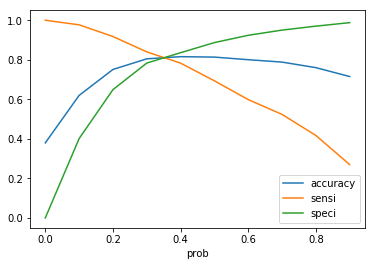

In [62]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [63]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.878366,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.106748,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.053126,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.933981,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.213953,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [64]:
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8047708725674827

In [75]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3096,  857],
       [ 387, 2032]], dtype=int64)

In [76]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8400165357585779

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.7832026309132305

In [79]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21679736908676955


In [80]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7033575631706472


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8888888888888888


# Precision and Recall

In [82]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3506,  447],
       [ 741, 1678]], dtype=int64)

Precision

In [83]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7896470588235294

Recall

In [84]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6936750723439438

In [85]:
from sklearn.metrics import precision_score, recall_score

In [88]:
?precision_score

In [89]:
precision_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.7896470588235294

In [90]:
recall_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.6936750723439438

# Precision and Recall Tradeoff

In [91]:
from sklearn.metrics import precision_recall_curve

In [94]:
y_train_pred_final.Convert, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
 5       0
 6       0
 7       1
 8       1
 9       1
 10      0
 11      0
 12      0
 13      0
 14      1
 15      1
 16      0
 17      0
 18      1
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      1
 26      0
 27      0
 28      1
 29      0
        ..
 6342    1
 6343    0
 6344    0
 6345    1
 6346    1
 6347    1
 6348    0
 6349    0
 6350    1
 6351    0
 6352    0
 6353    1
 6354    0
 6355    0
 6356    0
 6357    1
 6358    0
 6359    0
 6360    0
 6361    0
 6362    0
 6363    1
 6364    0
 6365    1
 6366    1
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Convert, Length: 6372, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
 5       0
 6       1
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      1
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      1
 25      1


In [96]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

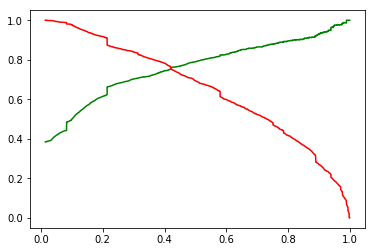

In [97]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Predictions of test dataset

In [66]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train_new = X_train_sm.drop(['const'], axis=1)
X_test_sm = X_test[X_train_new.columns]


C:\Users\yogita.g\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [67]:
X_test_sm = sm.add_constant(X_test_sm)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['CustID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Convert_Prob'], axis=1)
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.816550714024167

Assigning lead score from 0 to 100

In [98]:
y_pred_final['Score'] = y_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final['Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))

We can see the equation is:

Logit(P) = - 0.3913 - 1.5154 x Do Not Email is Yes + 1.1025 x Total Time Spent on Website - 0.8830 x Lead Origin of 'Landing Page Submission' + 2.4056 x Lead Origin of 'Lead Add Form' + 2.3710 x Lead Source of 'Welingak Website' + 1.0378 x Country is Unknown - 0.9764 x Specialization dont know + 2.3871 x CurrentOccupation is Working Professional - 1.1061 x What MattersMost is dont know + 3.1165 x LastNotableActivity is 'Had a Phone Conversation' + 1.6237 x LastNotableActivity is 'SMS Sent' + 1.9850 x LastNotableActivity is 'Unreachable' + 1.4439 x LastNotableActivity is 'Unsubscribed'

Score = Logit(P) x 100 (score between 0 and 100)